# Fish Market Analysis
This notebook analyzes the data of a fish market. Multiple variables are in the dataset, and we have to look for relationships between the data and build a model that fits it the best by predicting weight of fish species.

*Expected*: An Accuracy of over 0.75 to be considered acceptable.

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

In [ ]:
df = pd.read_csv('FishMarket_MultipleLinearRegression.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [ ]:
df.isna()     #check for null values

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


**Visualizing the data**

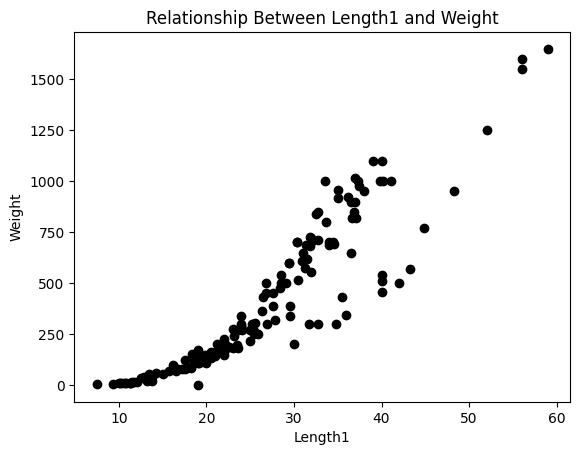

In [ ]:
plt.scatter(df.Length1.values.tolist(), df.Weight.values.tolist(),color='black')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Relationship Between Length1 and Weight')
plt.plot()
plt.show()

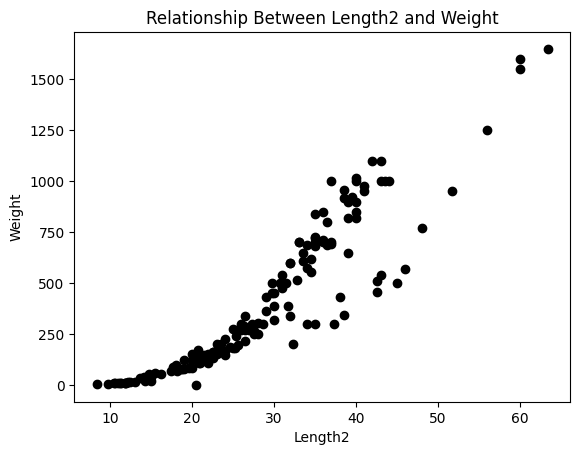

In [ ]:
plt.scatter(df.Length2.values.tolist(), df.Weight.values.tolist(),color='black')
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.title('Relationship Between Length2 and Weight')
plt.plot()
plt.show()

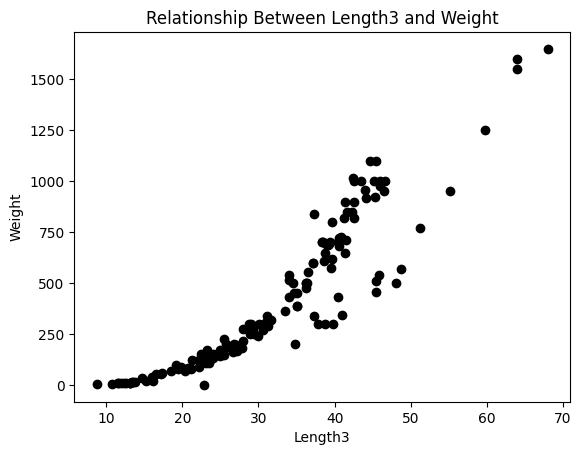

In [ ]:
plt.scatter(df.Length3.values.tolist(), df.Weight.values.tolist(),color='black')
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.title('Relationship Between Length3 and Weight')
plt.plot()
plt.show()

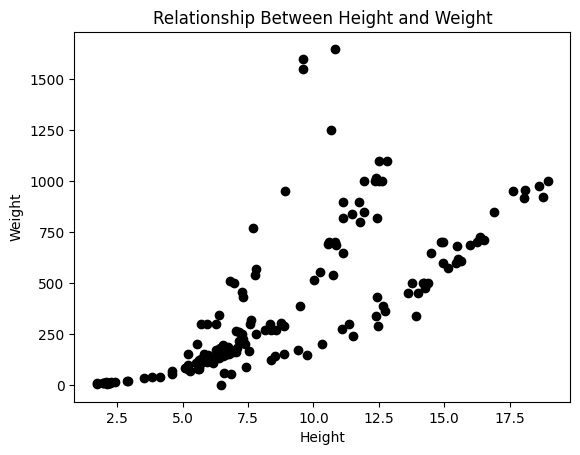

In [ ]:
plt.scatter(df.Height.values.tolist(), df.Weight.values.tolist(),color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Relationship Between Height and Weight')
plt.plot()
plt.show()

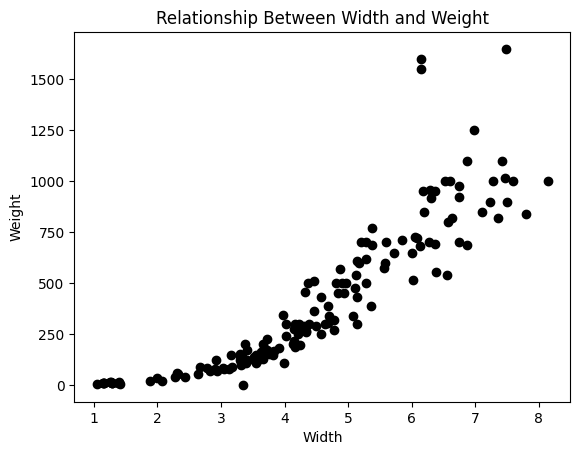

In [ ]:
plt.scatter(df.Width.values.tolist(), df.Weight.values.tolist(),color='black')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Relationship Between Width and Weight')
plt.plot()
plt.show()

Quick Sanity check for the dataframe

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Re-ordering the features and dependent variables**

In [ ]:
orders_cols = ["Species", "Length1", "Length2","Length3", "Height", "Width","Weight"]
df=df.reindex(columns=orders_cols)
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


Perfect. Now, on towards building the model. Species column is the categorical data.




# The Model
The model we will use is a multiple linear regression model to predict the weight. At the end, we will compare the weights of our test sets and the ones out model predicted for the test set.

In [ ]:
# Split into matrix of features and dependant variables
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

# Encoding the Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ([0]))], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 30.0 11.52 4.02]
 [1.0 0.0 0.0 ... 31.2 12.48 4.3056]
 [1.0 0.0 0.0 ... 31.1 12.3778 4.6961]
 ...
 [0.0 0.0 0.0 ... 13.8 2.277 1.2558]
 [0.0 0.0 0.0 ... 15.2 2.8728 2.0672]
 [0.0 0.0 0.0 ... 16.2 2.9322 1.8792]]


# Splitting into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Checking predictions for test sets

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 398.  390.]
 [ 130.    0.]
 [ 209.  170.]
 [ 210.  160.]
 [ 686.  556.]
 [ 872.  900.]
 [ 663.  800.]
 [ 420.  300.]
 [1004.  975.]
 [ 142.  115.]
 [ 287.  200.]
 [ 526.  456.]
 [ 720. 1000.]
 [1018. 1000.]
 [-115.   60.]
 [  27.   78.]
 [ 164.  145.]
 [ 957. 1600.]
 [ 183.  130.]
 [ 733.  720.]
 [-104.   55.]
 [ 512.  390.]
 [ 168.  120.]
 [1126. 1650.]
 [ -26.   90.]
 [ 477.  450.]
 [ 708.  700.]
 [ 241.  270.]
 [ 888.  850.]
 [  14.   10.]
 [ 586.  650.]
 [ 166.  110.]
 [ 957. 1550.]
 [ 343.  300.]
 [ 580.  700.]
 [ 271.  225.]
 [ 377.  300.]
 [ 652.  620.]
 [ 708.  700.]
 [ 161.  135.]
 [ 656.  514.]
 [ -98.   40.]
 [ 225.  145.]
 [ 756.  714.]
 [ 146.   20.]
 [ 281.  197.]
 [ 231.  180.]
 [ 289.  218.]]


The Model is overfit. Something needs to be done. Hmmm.

# Feature Elimination

In [ ]:
df.drop('Species',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length1  159 non-null    float64
 1   Length2  159 non-null    float64
 2   Length3  159 non-null    float64
 3   Height   159 non-null    float64
 4   Width    159 non-null    float64
 5   Weight   159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [ ]:
# Running the Model again
X = df.iloc[: , :-1].values
# y is the same dependant variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

score = reg_model.score(X_test, y_test)
print(f"Regression Model Score: {score}")

Regression Model Score: 0.8136987517934344


In [ ]:
y_pred = reg_model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredicted vs Actual:")
print(comparison_df.head())



Predicted vs Actual:
   Actual   Predicted
0   390.0  462.904976
1     0.0  176.797928
2   170.0  226.624847
3   160.0  185.662045
4   556.0  663.314987


# Accuracy of the model
The accuracy of the model comes out to be 0.81 .